# Práctica 1. Redes Neuronales Artificiales

Análisis y preprocesamiento del dataset [**wine-quality**](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) y construcción de redes neuronales *Multilayer Perceptron* para predecir el tipo de vino que representa cada instancia (vino tinto o vino blanco).

**Autor**: Nicolás Cubero

**Fecha**: 16 de Marzo de 2020

## Carga de librerías

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from keras.models import Sequential
from keras.layers import Dense

## Carga de archivos

Procedemos primeramente a cargar los datos desde los ficheros *csv*:

In [10]:
# Cargar los datos de los vinos blancos
white = pd.read_csv('winequality-white.csv', sep=';')

# Cargar los datos de los vinos tinto
red = pd.read_csv('winequality-red.csv', sep=';')

## Análisis exploratorio de datos

En primer lugar, realizamos un breve **análisis exploratorio de datos** para obtener más información de la naturaleza de los datos, así como la distribución de sus variables y las relaciones entre las mismas.

Para empezar, analizaremos el aspecto de cada *dataset* y se estudiarán sus estadísticos básicos.

In [12]:
white.info() # Descripción del dataset de vinos blanco
print()
red.info() # Descripción del dataset de vinos tinto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float6

Ambos *datasets* se han cargado con totas sus columnas, de ellas, todas las variables a excepción de *quality*, son variables numéricas reales, mientras que *quality* es la única variable numérica entera del *dataset*.

Por otro lado, se aprecia que el *dataset* de vinos blanco presenta 4898 instancias, mientras que el *dataset* de vinos rojos 1599.

Comprobamos más detalladamente que los *datasets* no presenten valores perdidos.

In [21]:
# Comprobar la existencia de valores perdidos en el dataset de vinos blancos
white.isnull().any(axis=0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [22]:
# Comprobar la existencia de valores perdidos en el dataset de vinos blancos
red.isnull().any(axis=0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Se comprueba, por tanto, que los *datasets* cargados **no presentan valores valores perdidos** en ninguna de sus columnas y que, **los datos se han cargado correctamente** desde los ficheros *csv*.

Mostramos las primeras 5 filas del *dataset* red:

In [14]:
white.head() # Mostrar las primeras filas del dataset white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Y las 5 últimas filas del *dataset* red:

In [15]:
red.tail() # Mostrar las primeras filas del dataset red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Por último analizamos los estadísticos básicos de ambos *datasets*:

In [16]:
# Estadísticos básicos de white
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
# Estadísticos básicos de red
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


De este análisis preliminar, podemos observar los siguientes aspectos:
- El *pH* de los vinos es, fundamentalmente ácido (*pH* es menor que 7). Por su parte, los vinos tintos presentan más ácidez (su media, mediana y valor máximo son algo mayores que los vinos blancos).
- El ácido volatil de los vinos blancos se halla comprendido dentro de los límites legales marcados por EEUU. No ocurre lo mismo con los vinos tintos, lo cual nos lleva a pensar que el *dataset* recoge datos de vinos procedentes de otras regiones del mundo.
- Los niveles de *alcohol* de ambos vinos y la distribución de esta variable es similar en ambos tipos de vinos.

## Visualización de los datos

En segundo lugar, visualizamos de forma gráfica la distribución de algunas variables de interés:

En este sentido, resulta de gran interés analizar la distribución de la variable *alcohol*:

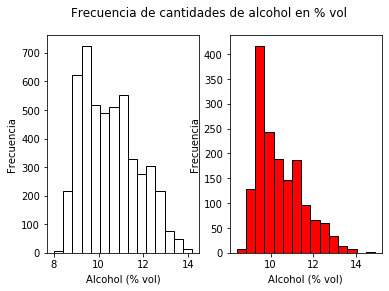

In [25]:
# Mostramos la variable alcohol
fig, ax = plt.subplots(1, 2)

# Mostrar histograma de ambos datasets
ax[0].hist(white['alcohol'], 15, facecolor='white', ec='black', label='Vino blanco')
ax[1].hist(red['alcohol'], 15, facecolor='red', ec='black', label='Vino tinto')

ax[0].set_xlabel('Alcohol (% vol)')
ax[0].set_ylabel('Frecuencia')
ax[1].set_xlabel('Alcohol (% vol)')
ax[1].set_ylabel('Frecuencia')

fig.suptitle('Frecuencia de cantidades de alcohol en % vol')

plt.show()

Si bien se observa que ambos tipos de vinos presentan cantidades similares de alcohol, **para el vino tinto, existe una menor cantidad de vinos que presenten un volumen de alcohol superior al 10%**

Analizamos ahora la relación entre los sulfatos y la calidad del vino:

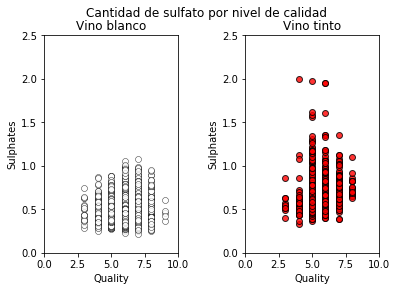

In [29]:
fig, ax = plt.subplots(1, 2)

# Mostrar nube de puntos entre el nivel de sulfato y la calidad del vino
ax[0].scatter(white['quality'], white['sulphates'], color='white', edgecolors='black', alpha=0.8, lw=0.5)
ax[1].scatter(red['quality'], red['sulphates'], color='red', edgecolors='black', alpha=0.8)

ax[0].set_title('Vino blanco')
ax[1].set_title('Vino tinto')

ax[0].set_xlabel('Quality')
ax[1].set_xlabel('Quality')

ax[0].set_ylabel('Sulphates')
ax[1].set_ylabel('Sulphates')

ax[0].set_xlim([0, 10])
ax[0].set_ylim([0, 2.5])
ax[1].set_xlim([0, 10])
ax[1].set_ylim([0, 2.5])

fig.subplots_adjust(wspace=0.5)
fig.suptitle('Cantidad de sulfato por nivel de calidad')

plt.show()

Se puede apreciar que, a iguales niveles de calidad, el vino tinto presenta mayor cantidad de sulfatos.

Analizamos la **acidez** de los vinos:

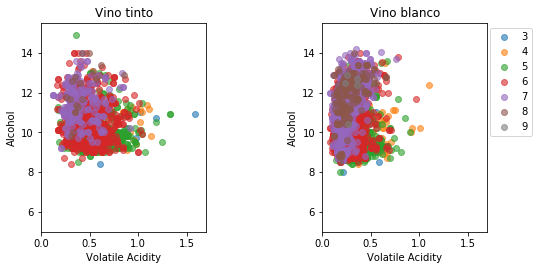

In [39]:
redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

# Mostrar diagrama de puntos de los niveles de alcohol frente a acidez
fig, ax = plt.subplots(1, 2, figsize=(8,4))

redcolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
             'tab:purple', 'tab:brown']
whitecolors = redcolors + ['tab:gray'] #np.append(redcolors, np.random.rand(1, 4), axis=0)


for i in range(len(redcolors)):
    redy = red['alcohol'][red['quality'] == redlabels[i]]
    redx = red['volatile acidity'][red['quality'] == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i], alpha=0.6)

for i in range(len(whitecolors)):
    whitey = white['alcohol'][white['quality'] == whitelabels[i]]
    whitex = white['volatile acidity'][white['quality'] == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i], alpha=0.6)

ax[0].set_title('Vino tinto')
ax[1].set_title('Vino blanco')
ax[0].set_xlim([0, 1.7])
ax[1].set_xlim([0, 1.7])
ax[0].set_ylim([5, 15.5])
ax[1].set_ylim([5, 15.5])

ax[0].set_xlabel('Volatile Acidity')
ax[1].set_xlabel('Volatile Acidity')
ax[0].set_ylabel('Alcohol')
ax[1].set_ylabel('Alcohol')

ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))

fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

En el anterior grafico, se observa que la mayor parte de los vinos de calidad 7 y 8 presentan niveles de ácido volátil inferior a 0.5

# Preprocesamiento de Datos

Procedemos a unificar los *datasets* y a preprocesarlos para desarrollar modelos de redes neuronales *MLP*

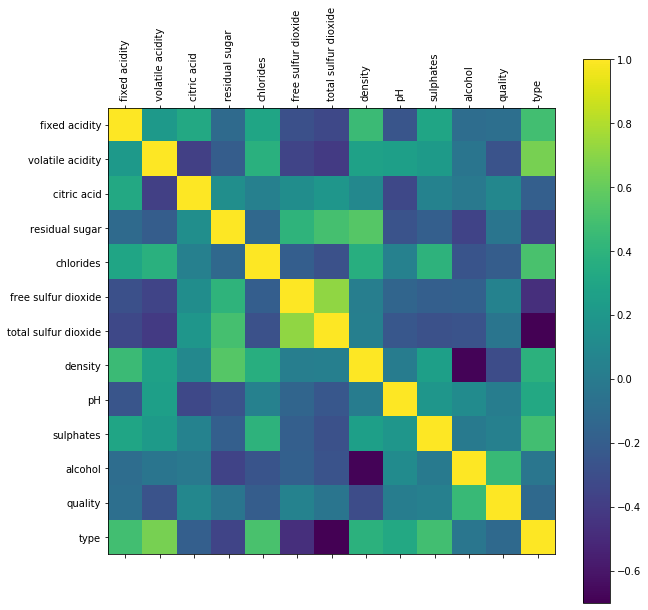

In [65]:
# Añadir columna "type" a los *datasets*
red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index=True)

# Calcular matriz de correlaciones
corr = wines.corr()

# Mostrar la matriz de correlaciones
fig, ax = plt.subplots(1, 1, figsize=(10,10))
cax = ax.matshow(corr)
ax.set_xticks(np.arange(len(wines.columns)))
ax.set_xticklabels(wines.columns, rotation='vertical')
ax.set_yticks(np.arange(len(wines.columns)))
ax.set_yticklabels(wines.columns)

fig.colorbar(cax)

plt.show()
#sns.heatmap(corr, xticklabels=corr.columns.values,
 #          ytick=corr.columns.values)

De esta matriz de correlaciones podemos observar fuertes correlaciones lineales entre las variables 

# Entrenamiento de modelos

Una vez analizados y  preprocesados los datos, procedemos a dividir el conjunto de datos en dos subconjuntos: *train* para entrenar los modelos y *test* para validar dichos modelos.

In [78]:
# Separar los datos de la etiqueta que se pretende predecir
X = wines.iloc[:,:11]
y = wines.iloc[:,12]

# Separar los datos en los conjuntos de train y validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Todos los atributos de los *datasets* son atributos numéricos. Para evitar que los valores de unos atributos predominen sobre otros, **normalizamos** las variables de los *datasets*:

In [79]:
# Utilidad para efectuar la normalización
scaler = StandardScaler().fit(X_train)

# Normalizar el conjunto de train
X_train = scaler.transform(X_train)

# Normalizar el conjunto de test
X_test = scaler.transform(X_test)

Definimos la arquitectura del modelo *MLP* que vamos a emplear:
- Capa de entrada de 11 unidades.
- Capa oculta de 12 unidades con *RELU* como función de activación.
- Capa oculta de 8 unidades con *RELU* como función de activación.
- Capa de salida con 1 nodo de salida y función de activación sigmoide

In [80]:
def model_MLP():
    
    """Crea un modelo básico MLP con la siguiente estructura:

        - Capa de entrada de 11 unidades.
        - Capa oculta de 12 unidades con *RELU* como función de activación.
        - Capa oculta de 8 unidades con *RELU* como función de activación.
        - Capa de salida con 1 nodo de salida y función de activación sigmoide
    """
    
    model = Sequential()
    
    # Añadir primera capa intermedia
    model.add(Dense(12, activation='relu', input_shape=(11,)))
    
    # Añadir segunda capa intermedia
    model.add(Dense(8, activation='relu'))
    
    # Añadir capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    return model

Creamos este modelo y definimos como función de error entropía cruzada binaria (*binary_crossentropy*) empleando como método de ajuste el implementado en el optimizador de Adam:

In [81]:
# Crear el modelo y compilarlo
model = model_MLP() # Crear modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar su arquitectura
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


Procedemos a ejecutar el entrenamiento:

In [82]:
history = model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=True)

Epoch 1/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0902 - accuracy: 0.9731
Epoch 2/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0320 - accuracy: 0.9924
Epoch 3/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0241 - accuracy: 0.9947
Epoch 4/20
4352/4352 [==============================] - 8s 2ms/step - loss: 0.0213 - accuracy: 0.9966
Epoch 5/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0173 - accuracy: 0.9961
Epoch 6/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0163 - accuracy: 0.9972
Epoch 7/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0153 - accuracy: 0.9972
Epoch 8/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0164 - accuracy: 0.9975
Epoch 9/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.0134 - accuracy: 0.9972
Epoch 10/20
4352/4352 [==============================] - 7s 2ms/step - loss: 0.

Mostramos la evolución de las métricas *accuracy* y *loss* a lo largo de las *epochs*:

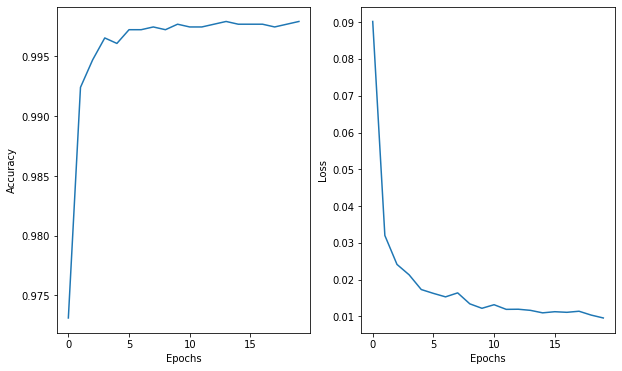

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))

# Mostrar la evolución del accuracy y loss
ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(history.history['loss'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.show()

Predecimos las etiquetas del conjunto de test con el modelo elaborado:

In [91]:
y_pred = model.predict(X_test, verbose=True)
y_pred = (y_pred >= 0.5).astype('int64').squeeze()

y_pred

2145/2145 [==============================] - 0s 15us/step


array([0, 1, 0, ..., 0, 0, 0])

Procedemos a evaluar el rendimiento de este modelo mediante el conjunto de *test*:

In [88]:
score = model.evaluate(X_test, y_test, verbose=True)

print('Loss obtenido en test: {}'.format(score[0]))
print('Accuracy obtenido en test: {}'.format(score[1]))

2145/2145 [==============================] - 0s 31us/step
Loss obtenido en test: 0.026065816510634627
Accuracy obtenido en test: 0.9953380227088928


Evaluamos también otras métricas:

In [94]:
# Calcular la matriz de confusión
conf = confusion_matrix(y_test, y_pred)

print('Matriz de confusión:')
print(conf)

# Precisión del modelo
print('Precisión del modelo: {}'.format(precision_score(y_test, y_pred)))

# Recall del modelo
print('Recall del modelo: {}'.format(recall_score(y_test, y_pred)))

# F1-score del modelo
print('F1-score del modelo: {}'.format(f1_score(y_test, y_pred)))

# Cohen's kappa del modelo
print('Métrica Cohen\'s kappa del modelo: {}'.format(cohen_kappa_score(y_test, y_pred)))

Matriz de confusión:
[[1587    1]
 [   9  548]]
Precisión del modelo: 0.9981785063752276
Recall del modelo: 0.9838420107719928
F1-score del modelo: 0.9909584086799277
Métrica Cohen' kappa del modelo: 0.9878179265599869


Observamos que el rendimiento del modelo es elevado y logra predecir con mucha exactitud los tipos de vinos

# Otras mejoras

Por último, se probarán otros modelos diferentes discutiéndose sus rendimientos:

1. Modelo con 4 capas intermedias

Primeramente, se repetirá el experimento anterior usando otro modelo *MLP* con 4 capas intermedias:
- Capa de entrada de 11 unidades.
- Capa oculta de 12 unidades con *RELU* como función de activación.
- Capa oculta de 8 unidades con *RELU* como función de activación.
- Capa oculta de 4 unidades con *RELU* como función de activación.
- Capa oculta de 2 unidades con *RELU* como función de activación.
- Capa de salida con 1 nodo de salida y función de activación sigmoide

In [96]:
def model_deep_MLP():
    
    """Crea un modelo básico MLP con la siguiente estructura:

        - Capa de entrada de 11 unidades.
        - Capa oculta de 12 unidades con *RELU* como función de activación.
        - Capa oculta de 8 unidades con *RELU* como función de activación.
        - Capa oculta de 4 unidades con *RELU* como función de activación.
        - Capa oculta de 2 unidades con *RELU* como función de activación.
        - Capa de salida con 1 nodo de salida y función de activación sigmoide
    """
    
    model = Sequential()
    
    # Añadir primera capa intermedia
    model.add(Dense(12, activation='relu', input_shape=(11,)))
    
    # Añadir segunda capa intermedia
    model.add(Dense(8, activation='relu'))

    # Añadir tercera capa intermedia
    model.add(Dense(4, activation='relu'))

     # Añadir cuarta capa intermedia
    model.add(Dense(2, activation='relu'))
    
    # Añadir capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [101]:
# Crear el modelo y compilarlo
model_deep = model_deep_MLP() # Crear modelo
model_deep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar su arquitectura
model_deep.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 3         
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


Y procedemos a entrenar y evaluar este modelo:

In [102]:
# Entrenar el modelo deep
model_deep.fit(X_train, y_train, epochs=20, batch_size=1, verbose=True)

# Evaluar el modelo
y_pred = model_deep.predict(X_test, verbose=True)
y_pred = (y_pred >= 0.5).astype('int64').squeeze()

score = model_deep.evaluate(X_test, y_test, verbose=True)

print('Loss obtenido en test: {}'.format(score[0]))
print('Accuracy obtenido en test: {}'.format(score[1]))

# Calcular la matriz de confusión
conf = confusion_matrix(y_test, y_pred)

print('Matriz de confusión:')
print(conf)

# Precisión del modelo
print('Precisión del modelo: {}'.format(precision_score(y_test, y_pred)))

# Recall del modelo
print('Recall del modelo: {}'.format(recall_score(y_test, y_pred)))

# F1-score del modelo
print('F1-score del modelo: {}'.format(f1_score(y_test, y_pred)))

# Cohen's kappa del modelo
print('Métrica Cohen\'s kappa del modelo: {}'.format(cohen_kappa_score(y_test, y_pred)))

Epoch 1/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.1398 - accuracy: 0.9676
Epoch 2/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0301 - accuracy: 0.9936
Epoch 3/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0261 - accuracy: 0.9943
Epoch 4/20
4352/4352 [==============================] - 10s 2ms/step - loss: 0.0243 - accuracy: 0.9952
Epoch 5/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0225 - accuracy: 0.9947
Epoch 6/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0218 - accuracy: 0.9952
Epoch 7/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0187 - accuracy: 0.9966
Epoch 8/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0171 - accuracy: 0.9963
Epoch 9/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.0152 - accuracy: 0.9966
Epoch 10/20
4352/4352 [==============================] - 9s 2ms/step - loss: 0.01

Se puede apreciar que el modelo de este modelo es similar al modelo original. El incremento en el número de capas no ha producido ningún incremento o empeoramiento en el rendimiento del modelo. Sin embargo, el incremento en el número de capas provoca que el modelo tome 2 segundos más en completar cada *epoch* durante el entrenamiento

2. Modelo con menos unidades ocultas

Se repite el experimento ahora usando otro modelo con menor número de unidades:
- Capa de entrada de 11 unidades.
- Capa oculta de 8 unidades con *RELU* como función de activación.
- Capa oculta de 4 unidades con *RELU* como función de activación.
- Capa de salida con 1 nodo de salida y función de activación sigmoide

In [111]:
def model_less_MLP():
    
    """Crea un modelo básico MLP con la siguiente estructura:

        - Capa de entrada de 11 unidades.
        - Capa oculta de 8 unidades con *RELU* como función de activación.
        - Capa oculta de 4 unidades con *RELU* como función de activación.
        - Capa de salida con 1 nodo de salida y función de activación sigmoide
    """
    
    model = Sequential()
    
    # Añadir primera capa intermedia
    model.add(Dense(8, activation='relu', input_shape=(11,)))

    # Añadir segunda capa intermedia
    model.add(Dense(4, activation='relu'))
    
    # Añadir capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [112]:
# Crear el modelo y compilarlo
model_less = model_less_MLP() # Crear modelo
model_less.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar su arquitectura
model_less.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


Procedemos a entrenar nuestro modelo y a validarlo:

In [113]:
# Entrenar el modelo leep
model_less.fit(X_train, y_train, epochs=20, batch_size=1, verbose=True)

# Evaluar el modelo
y_pred = model_less.predict(X_test, verbose=True)
y_pred = (y_pred >= 0.5).astype('int64').squeeze()

score = model_deep.evaluate(X_test, y_test, verbose=True)

print('Loss obtenido en test: {}'.format(score[0]))
print('Accuracy obtenido en test: {}'.format(score[1]))

# Calcular la matriz de confusión
conf = confusion_matrix(y_test, y_pred)

print('Matriz de confusión:')
print(conf)

# Precisión del modelo
print('Precisión del modelo: {}'.format(precision_score(y_test, y_pred)))

# Recall del modelo
print('Recall del modelo: {}'.format(recall_score(y_test, y_pred)))

# F1-score del modelo
print('F1-score del modelo: {}'.format(f1_score(y_test, y_pred)))

# Cohen's kappa del modelo
print('Métrica Cohen\'s kappa del modelo: {}'.format(cohen_kappa_score(y_test, y_pred)))

Epoch 1/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0982 - accuracy: 0.9766
Epoch 2/20
4352/4352 [==============================] - 22s 5ms/step - loss: 0.0343 - accuracy: 0.9924
Epoch 3/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0279 - accuracy: 0.9931
Epoch 4/20
4352/4352 [==============================] - 24s 6ms/step - loss: 0.0238 - accuracy: 0.9945
Epoch 5/20
4352/4352 [==============================] - 24s 6ms/step - loss: 0.0214 - accuracy: 0.9949
Epoch 6/20
4352/4352 [==============================] - 22s 5ms/step - loss: 0.0214 - accuracy: 0.9949
Epoch 7/20
4352/4352 [==============================] - 21s 5ms/step - loss: 0.0180 - accuracy: 0.9966
Epoch 8/20
4352/4352 [==============================] - 22s 5ms/step - loss: 0.0181 - accuracy: 0.9956
Epoch 9/20
4352/4352 [==============================] - 24s 6ms/step - loss: 0.0177 - accuracy: 0.9970
Epoch 10/20
4352/4352 [==============================] - 24s 6ms/step - l

Se aprecia que, aunque el rendimiento de este modelo también es similar al modelo original, aunque comparando la matriz de confusión de este modelo con el modelo original, se observa que este modelo clasifica incorrectamente 3 de los vinos tintos, 2 más que el modelo original.

3. Modelo con tangente hiperbólica como función de activación.

Ahora, sustituiremos la función de activación *RELU* por la función tangente hiperbólica (*tanh*) y repetiremos los experimentos, comparando los resultados obtenidos con los de los anteriores modelos:

In [108]:
def model_tanh_MLP():
    
    """Crea un modelo básico MLP con la siguiente estructura:

        - Capa de entrada de 11 unidades.
        - Capa oculta de 12 unidades con tanh como función de activación.
        - Capa oculta de 8 unidades con tanh como función de activación.
        - Capa de salida con 1 nodo de salida y función de activación sigmoide
    """
    
    model = Sequential()
    
    # Añadir primera capa intermedia
    model.add(Dense(12, activation='tanh', input_shape=(11,)))
    
    # Añadir segunda capa intermedia
    model.add(Dense(8, activation='tanh'))
    
    # Añadir capa de salida
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [109]:
# Crear el modelo y compilarlo
model_tanh = model_tanh_MLP() # Crear modelo
model_tanh.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar su arquitectura
model_tanh.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo y lo evaluamos:

In [110]:
# Entrenar el modelo deep
model_tanh.fit(X_train, y_train, epochs=20, batch_size=1, verbose=True)

# Evaluar el modelo
y_pred = model_tanh.predict(X_test, verbose=True)
y_pred = (y_pred >= 0.5).astype('int64').squeeze()

score = model_tanh.evaluate(X_test, y_test, verbose=True)

print('Loss obtenido en test: {}'.format(score[0]))
print('Accuracy obtenido en test: {}'.format(score[1]))

# Calcular la matriz de confusión
conf = confusion_matrix(y_test, y_pred)

print('Matriz de confusión:')
print(conf)

# Precisión del modelo
print('Precisión del modelo: {}'.format(precision_score(y_test, y_pred)))

# Recall del modelo
print('Recall del modelo: {}'.format(recall_score(y_test, y_pred)))

# F1-score del modelo
print('F1-score del modelo: {}'.format(f1_score(y_test, y_pred)))

# Cohen's kappa del modelo
print('Métrica Cohen\'s kappa del modelo: {}'.format(cohen_kappa_score(y_test, y_pred)))

Epoch 1/20
4352/4352 [==============================] - 26s 6ms/step - loss: 0.0834 - accuracy: 0.9747
Epoch 2/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0245 - accuracy: 0.9943
Epoch 3/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0221 - accuracy: 0.9952
Epoch 4/20
4352/4352 [==============================] - 24s 5ms/step - loss: 0.0199 - accuracy: 0.9952
Epoch 5/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0187 - accuracy: 0.9961
Epoch 6/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0178 - accuracy: 0.9961
Epoch 7/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0149 - accuracy: 0.9972
Epoch 8/20
4352/4352 [==============================] - 25s 6ms/step - loss: 0.0142 - accuracy: 0.9972
Epoch 9/20
4352/4352 [==============================] - 22s 5ms/step - loss: 0.0135 - accuracy: 0.9970
Epoch 10/20
4352/4352 [==============================] - 25s 6ms/step - l

El modelo obtenido usando la función de activación *tanh*, también presenta un rendimiento similar a los anteriores modelos.